## CSCI 379-05. Tuesday, January 29
### Lab 1: Basic Classification, ROC Curves, and AUC.

You will start by getting familiar with the pandas package, practice loading, reading a dataset, and learn about data frames that pandas uses. You will also learn about the sklearn package to see simple examples of classification, using different thresholds for classification and computing the true positive and false positive rates, and the resulting ROC curves and the AUC metric. 

To start off create a *Lab1* folder in your (local) repo. Create a *data* folder in it. Create a new Lab01 Jupyter notebook, and type along all the commands and instructions in it. By next week, make sure you push to your gitlab repo to submit this lab. 

In [190]:
import pandas as pd

Pandas has two primary object types:

*DataFrame*: rows and columns ( pretty much like a spreadsheet)

*Series*: a single column

If you clone or download this repo, the 'Advertising.csv' file is in the *data* folder.

In [191]:
data = pd.read_csv('data/Advertising.csv', index_col=0)

In [192]:
# What does this do? 
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [193]:
# Any guesses on how you'd view the last four
# columns of this data frame? Write that line of code below. 


In [194]:
# check the shape of the DataFrame (rows, columns)
data.shape

(200, 4)

What are the features?
Write your answer below.

What is the target variable? Write your answer below as a Markdown cell.
Here's [a basic guide for markdown.](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet)

We'll use one more library for data visualization, called **seaborn**.

It should be installed with Anaconda, if it's not, run ** conda install seaborn** from the command line.

In [195]:
import seaborn as sns

The line below allows plots to appear in the notebook.

In [196]:
%matplotlib inline

We'll use a scatter plot to visualize the relationship between the features and the response variable.

Learn more here about the scatter plot https://seaborn.pydata.org/generated/seaborn.pairplot.html

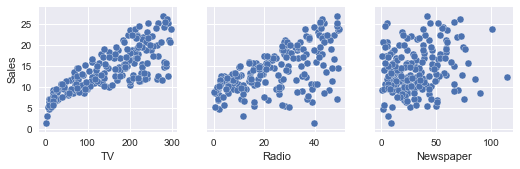

In [197]:
sns.pairplot(data, x_vars = ['TV', 'Radio', 'Newspaper'], y_vars = 'Sales') 

Visit the documentation on seaborn to make a linear regression line appear on this plot. Write your code below.

We can look at a subset of the original dataframe.

In [198]:
feature_cols = ['TV', 'Radio', 'Newspaper']

In [199]:
X = data[feature_cols]

In [200]:
X.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [201]:
print(type(X))

<class 'pandas.core.frame.DataFrame'>


In [202]:
print(X.shape)

(200, 3)


In [203]:
# the response variable
y = data['Sales']

In [204]:
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

We'll use the **scikit-learn** python module to do all the heavy lifting for our regression and classification algorithms.

In particular, look at:

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [205]:
from sklearn.model_selection import train_test_split

What does the line below achieve? Write your answer in a markdown cell.

In [206]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

Learn more about linear regression by reading Wikipedia or searching for a resource. Here is [one resource.](http://r-statistics.co/Linear-Regression.html)

In [207]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()

linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [208]:
print(linreg.intercept_)

2.87696662232


In [209]:
print(linreg.coef_)

[ 0.04656457  0.17915812  0.00345046]


In [210]:
# What does this line achieve? 
# Write your answer in a markdown cell below.
y_pred = linreg.predict(X_test)

What is one way of comparing **y_pred** to **y_test**? Refer to the resources on linear regression you read. Read the [documentation] (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) to determine which function you can use to score a linear predictor. Write a line of code that uses that function.

In [211]:
# For example
from sklearn import metrics
print(metrics.mean_absolute_error(y_test, y_pred))

1.06689170826


# Onto Classification

Now, we'll go on to learn more a simple classification  technique called logistic regression.

We'll use the [Pima Indians Diabetes dataset](https://www.kaggle.com/uciml/pima-indians-diabetes-database) originally from the UCI Machine Learning Repository. If you cloned or downloaded this repo, then the data file is in the *data* folder, and you can place it in an appropriate folder wrt your Jupyter notebook.

In [212]:
path = 'data/pima-indians-diabetes.data'

In [213]:
# These are the column names
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

In [214]:
#reading it into a pandas dataframe
pima = pd.read_csv(path, header=None, names=col_names)

In [215]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [216]:
# these are the features we will use for our classification

feature_cols = ['pregnant', 'insulin', 'bmi', 'age']

In [217]:
# the feature matrix
X = pima[feature_cols]
# the label column
y = pima.label

In [218]:
#view a few
y.head()

0    1
1    0
2    1
3    0
4    1
Name: label, dtype: int64

In [219]:
# This line should be familiar from the linear regression section
from sklearn.model_selection import train_test_split

In [220]:
# Once again, create training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [221]:
# Use Logistic Regression this time
from sklearn.linear_model import LogisticRegression

Learn more about Logistic Regression. 
#### What is Logistic Regression?

#### **Linear regression:** continuous response is modeled as a linear combination of the features:
 
 $$y = \beta_0 + \beta_1x$$
 
#### **Logistic regression:** log-odds of a categorical response being "true" (1) is modeled as a linear combination of the features:
 
 $$\log \left({p\over 1-p}\right) = \beta_0 + \beta_1x$$

This is called the **logit function**.
 
Probability is sometimes written as $\pi$:
 
 $$\log \left({\pi\over 1-\pi}\right) = \beta_0 + \beta_1x$$

 The equation can be rearranged into the **logistic function**:
 
 $$\pi = \frac{e^{\beta_0 + \beta_1x}} {1 + e^{\beta_0 + \beta_1x}}$$

 In other words:

 - Logistic regression outputs the **probabilities of a specific class**
 - Those probabilities can be converted into **class predictions**

In [222]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [223]:
# What does this line achieve? 
y_pred_class = logreg.predict(X_test)

Visit the documentation for logreg.predict to determine what the classification threshold is. Write your answer below.



Now, we'll use a host of evaluation metrics, to evaluate how good the classification is.

In [224]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.692708333333


What is the definition of accuracy?

In [225]:
#  Write code below to print the 
# first 25 true and predicted responses



In [226]:
print(metrics.confusion_matrix(y_test, y_pred_class))

[[118  12]
 [ 47  15]]


In [227]:
confusion = metrics.confusion_matrix(y_test, y_pred_class)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

Compute the True Positive Rate and the False Positive Rate of this classifier?

In [228]:
TPR = TP/(TP + FN )

In [229]:
print(TPR)

0.241935483871


In [230]:
# Can also be computed by
print(metrics.recall_score(y_test, y_pred_class))

0.241935483871


In [231]:
FPR =(FP / float(TN + FP))

In [232]:
print(FPR)

0.0923076923077


## Adjust the classification threshold

In [233]:
# print the first 10 predicted responses
logreg.predict(X_test)[0:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1])

In [234]:
# print the first 10 predicted probabilities of class membership
logreg.predict_proba(X_test)[0:10, :]

array([[ 0.63247571,  0.36752429],
       [ 0.71643656,  0.28356344],
       [ 0.71104114,  0.28895886],
       [ 0.5858938 ,  0.4141062 ],
       [ 0.84103973,  0.15896027],
       [ 0.82934844,  0.17065156],
       [ 0.50110974,  0.49889026],
       [ 0.48658459,  0.51341541],
       [ 0.72321388,  0.27678612],
       [ 0.32810562,  0.67189438]])

In [235]:
# print the first 10 predicted probabilities for class 1
logreg.predict_proba(X_test)[0:10, 1]

array([ 0.36752429,  0.28356344,  0.28895886,  0.4141062 ,  0.15896027,
        0.17065156,  0.49889026,  0.51341541,  0.27678612,  0.67189438])

In [236]:
# store the predicted probabilities for class 1
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

In [237]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt

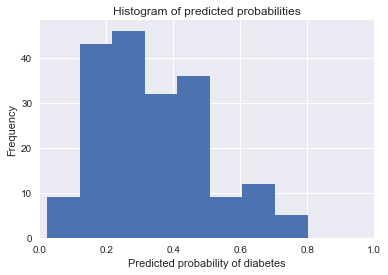

In [238]:
plt.hist(y_pred_prob, bins=8)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')

Let us decrease the threshold to 0.3, and see how it impacts the FPR and TPR.

In [239]:
# predict diabetes if the predicted probability is greater than 0.3
from sklearn.preprocessing import binarize
y_pred_class = binarize([y_pred_prob], 0.3)[0]

In [240]:
# print the first 10 predicted probabilities
y_pred_prob[0:10]

array([ 0.36752429,  0.28356344,  0.28895886,  0.4141062 ,  0.15896027,
        0.17065156,  0.49889026,  0.51341541,  0.27678612,  0.67189438])

In [241]:
# print the first 10 predicted classes with the lower threshold
y_pred_class[0:10]

array([ 1.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  1.])

In [242]:
# previous confusion matrix (default threshold of 0.5)
print(confusion)

[[118  12]
 [ 47  15]]


In [243]:
# new confusion matrix (threshold of 0.3)
new_confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(new_confusion)

[[80 50]
 [16 46]]


Compute the new TPR and FPR.

In [244]:
new_TP = new_confusion[1, 1]
new_TN = new_confusion[0, 0]
new_FP = new_confusion[0, 1]
new_FN = new_confusion[1, 0]

### ROC Curves and AUC

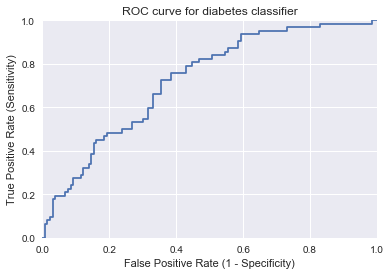

In [245]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [246]:
# define a function that accepts a threshold and prints TPR and FPR
def evaluate_threshold(threshold):
    print('TPR:', tpr[thresholds > threshold][-1])
    print('FPR:', fpr[thresholds > threshold][-1])

In [247]:
evaluate_threshold(0.5)


TPR: 0.241935483871
FPR: 0.0923076923077


In [248]:
evaluate_threshold(0.3)

TPR: 0.725806451613
FPR: 0.384615384615


And now, finally on to AUC.

In [249]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
print(metrics.roc_auc_score(y_test, y_pred_prob))

0.724565756824


Exercise: Compute the AUC Score for a threshold of 0.7.